In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [22]:
def generate_fake_data(num_users, num_movies, threshold):
    # Create a list of users
    np.random.seed(42)
    user_names = [f"User{i}" for i in range(1, num_users + 1)]
    # Create an empty DataFrame with rows for each movie
    df = pd.DataFrame(index=["Movie{}".format(i) for i in range(1, num_movies + 1)])
    for user_name in user_names:
        df[user_name] = np.random.randint(1, 6, size=num_movies)
    y = [1 if np.mean(row) > threshold else 0 for i,row in df.iterrows()]
    return df, y

In [23]:
x, y = generate_fake_data(5, 10000, 3)

In [24]:
x

,User1,User2,User3,User4,User5
Movie1,4,2,2,2,2
Movie2,5,4,1,2,3
Movie3,3,5,1,4,1
Movie4,5,4,1,2,2
Movie5,5,4,3,4,1
...,...,...,...,...,...
Movie9996,2,4,1,5,4
Movie9997,3,4,2,3,5
Movie9998,2,2,1,1,1
Movie9999,4,2,2,4,3


In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
model = MLPClassifier(hidden_layer_sizes=8, max_iter=30, learning_rate='constant', learning_rate_init=0.001, verbose=True)  # Example configuration
model.fit(X_train, y_train)

Iteration 1, loss = 0.76068906
Iteration 2, loss = 0.66184818
Iteration 3, loss = 0.61411850
Iteration 4, loss = 0.59055334
Iteration 5, loss = 0.57414231
Iteration 6, loss = 0.55963881
Iteration 7, loss = 0.54654604
Iteration 8, loss = 0.53385445
Iteration 9, loss = 0.52137750
Iteration 10, loss = 0.50986716
Iteration 11, loss = 0.49821700
Iteration 12, loss = 0.48690091
Iteration 13, loss = 0.47537410
Iteration 14, loss = 0.46459320
Iteration 15, loss = 0.45373739
Iteration 16, loss = 0.44328511
Iteration 17, loss = 0.43367207
Iteration 18, loss = 0.42414673
Iteration 19, loss = 0.41430921
Iteration 20, loss = 0.40469357
Iteration 21, loss = 0.39591207
Iteration 22, loss = 0.38649865
Iteration 23, loss = 0.37724889
Iteration 24, loss = 0.36829094
Iteration 25, loss = 0.35885628
Iteration 26, loss = 0.34908677
Iteration 27, loss = 0.33929373
Iteration 28, loss = 0.32877170
Iteration 29, loss = 0.31719033
Iteration 30, loss = 0.30683094


C:\Projects\statistical-learning-s23\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=8, max_iter=30, verbose=True)

In [34]:
y_pred = model.predict(X_test)

In [35]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1117
           1       0.91      0.93      0.92       883

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



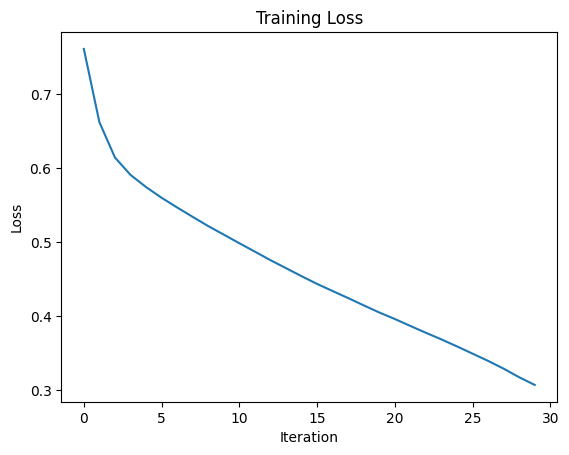

In [36]:
# Get the training loss values
training_loss = model.loss_curve_
# Plot the training loss curve
plt.plot(training_loss)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()